In [9]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from subprocess import check_output
print (check_output(["ls", "./input/"]).decode("utf-8"))

column_2C_weka.csv
column_3C_weka.csv



In [18]:
data = pd.read_csv("./input/column_2C_weka.csv")

print (plt.style.available)
plt.style.use('ggplot')

['seaborn-deep', 'Solarize_Light2', 'dark_background', 'seaborn-notebook', 'seaborn-poster', 'seaborn-white', 'bmh', 'seaborn-bright', 'classic', 'seaborn-talk', 'fivethirtyeight', 'fast', 'seaborn-ticks', 'seaborn-colorblind', '_classic_test', 'grayscale', 'tableau-colorblind10', 'seaborn-whitegrid', 'seaborn', 'ggplot', 'seaborn-dark', 'seaborn-muted', 'seaborn-pastel', 'seaborn-darkgrid', 'seaborn-dark-palette', 'seaborn-paper']


In [20]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


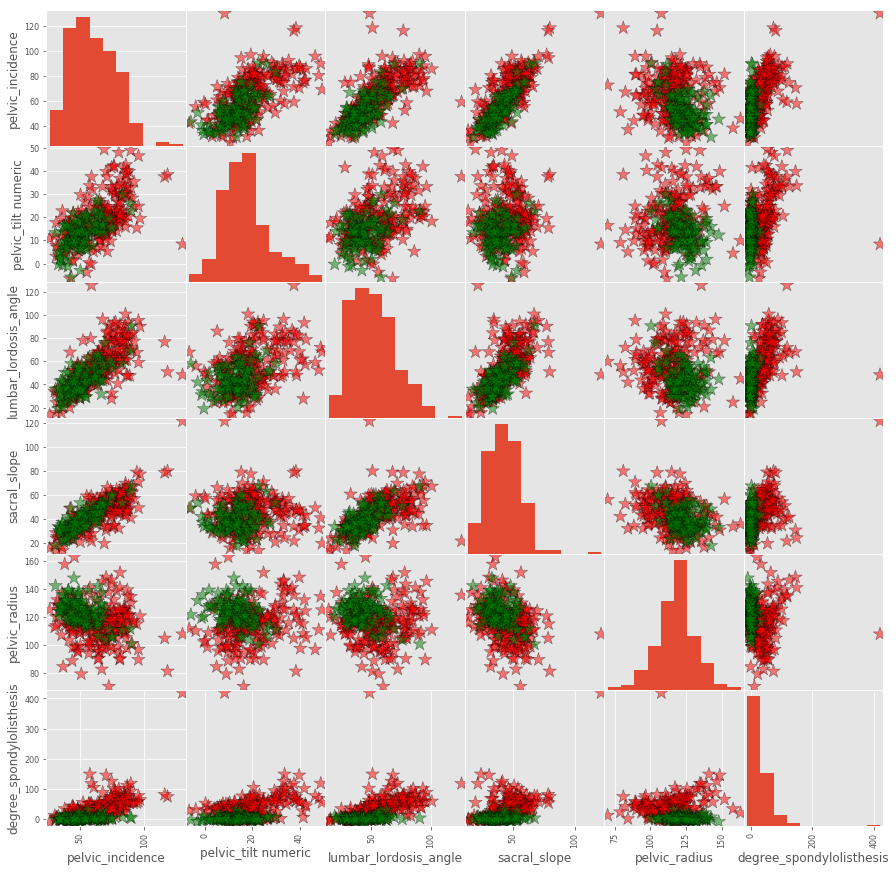

In [26]:
color_list= ['red' if i == 'Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

Abnormal    210
Normal      100
Name: class, dtype: int64

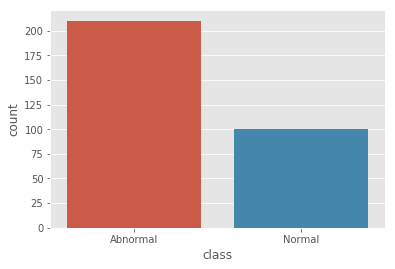

In [30]:
sns.countplot(x="class",  data=data)
data.loc[:,"class"].value_counts()

In [42]:
# Applying K nearest neighbour (KNN)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) # 3 Closest labeled data points 
x,y = data.loc[:, data.columns != 'class'], data.loc[:,"class"]
knn.fit(x,y)
prediction = knn.predict(x)

print ("Prediction : {} ".format(prediction))


Prediction : ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'A

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size= 0.3, random_state= 1)

knn = KNeighborsClassifier(n_neighbors=18) # 3 Closest labeled data points 
x,y = data.loc[:, data.columns != 'class'], data.loc[:,"class"]
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

print ("With KNN (k=3) accuracy is ", knn.score(x_test,y_test))
#K is hyperparameter and we choose it to give best performance, 
#if k is small it will lead to overfit, if it is to big it will lead to underfit

With KNN (k=3) accuracy is  0.8817204301075269


Text(0,0.5,'Accuray')

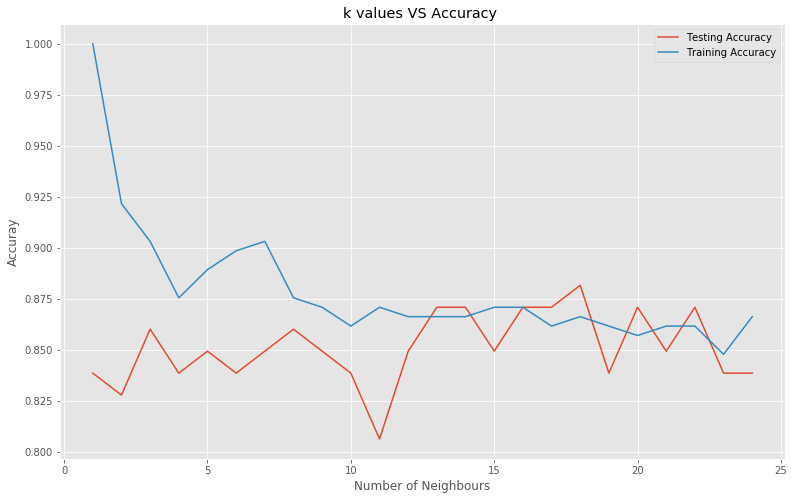

In [62]:
# Measuring and Visualizing Model Complexity

neighbours = np.arange(1,25)
train_accuracy = []
test_accuracy = []
for i , k in enumerate(neighbours):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))
    
    
plt.figure(figsize=[13,8])
plt.plot(neighbours, test_accuracy, label="Testing Accuracy")

plt.plot(neighbours, train_accuracy, label="Training Accuracy")

plt.legend()
plt.title('k values VS Accuracy ')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuray')

In [63]:
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Best accuracy is 0.8817204301075269 with K = 18


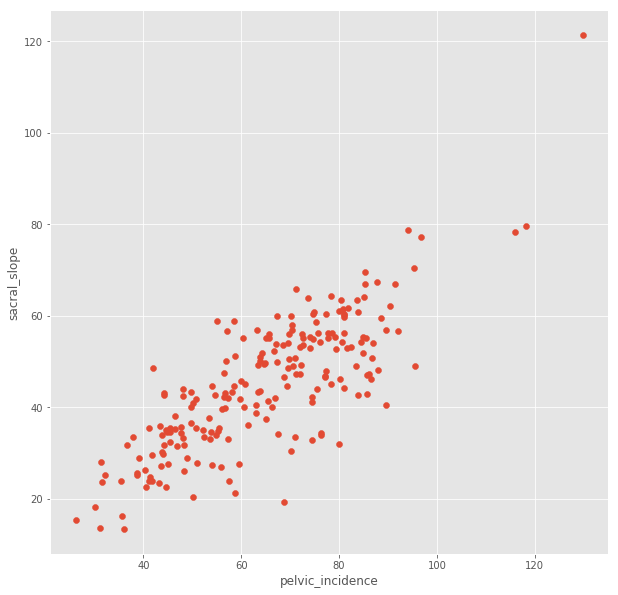

In [76]:
# using Regression
# Feature is pelvic_incidence , target is sacral_slope

data1 = data[data['class']== 'Abnormal']

x =np.array(data1.loc[:,"pelvic_incidence"]).reshape(-1,1)
y = np.array(data1.loc[:,"sacral_slope"]).reshape(-1,1)

plt.figure(figsize=[10,10])
plt.scatter(x=x, y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

R square score  0.6458410481075871


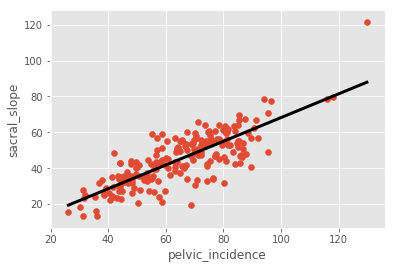

In [75]:
# Applying Linear Regression
# in linear Regression we use Ordinary least Square (OLS) as lost function 
#which is sum of square of residuals(error) values 
# Score uses R square method

from sklearn.linear_model import LinearRegression
reg= LinearRegression()
predict_space = np.linspace(min(x),max(x)).reshape(-1,1)
reg.fit(x,y)
predicted = reg.predict(predict_space)
print ("R square score ", reg.score(x,y))
plt.plot(predict_space, predicted , color ="black" ,linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [81]:
# Applying Cross Validation Technique

from sklearn.model_selection import cross_val_score
reg = LinearRegression()

k=5 
cv_result = cross_val_score(reg,x,y,cv=k)
print ("CV Scores ",cv_result)
print ("CV scores Average" , np.sum(cv_result)/k)

CV Scores  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores Average 0.3931462502884867


In [87]:
#Confusion Matrix and Random Forest 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

x, y = data.loc[:,data.columns != "class"], data.loc[:,"class"]
x_train, x_test,y_train , y_test = train_test_split(x,y,test_size=0.3 , random_state= 1)
rf= RandomForestClassifier(random_state=4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm =confusion_matrix(y_test,y_pred)

print ("Confusion Matrix \n", cm)
print ("Classification report \n" , classification_report(y_test,y_pred))

Confusion Matrix 
 [[58  8]
 [ 7 20]]
Classification report 
              precision    recall  f1-score   support

   Abnormal       0.89      0.88      0.89        66
     Normal       0.71      0.74      0.73        27

avg / total       0.84      0.84      0.84        93

